In [1]:
%load_ext autoreload
%autoreload 2

In [16]:
from environment import TrafficModel, Car
from util.network import create_braess_network, create_double_braess_network, create_cars

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from tqdm import trange

### Debugging

In [4]:
number_of_steps = 15

network = create_braess_network()
cars = {
    0: Car( 0, 0, 3, 1, anticipation_strategy='edge', position=((0, 1), 0), verbose=True),
    1: Car( 1, 0, 3, 1, anticipation_strategy='edge', position=((1, 2), 0), verbose=True),
    # 2: Car( 2, 0, 3, 1, anticipation_strategy='edge', position=((1, 2), 0), verbose=True)
}

model = TrafficModel(network, cars)

step_stats, car_stats = model.run_sequentially(number_of_steps)

100%|██████████| 15/15 [00:00<00:00, 4622.67it/s]

Latencies for routing decision: {(0, 1): 2.0, (0, 2): 10.0, (0, 0): 1.0, (1, 2): 1.0, (1, 3): 10.0, (1, 1): 1.0, (2, 3): 2.06, (2, 2): 1.0, (3, 3): 1.0}.
Car 1 at 2 chooses 3.
Latencies for routing decision: {(0, 1): 2.0, (0, 2): 10.0, (0, 0): 1.0, (1, 2): 1.0, (1, 3): 10.0, (1, 1): 1.0, (2, 3): 2.06, (2, 2): 1.0, (3, 3): 1.0}.
Car 0 at 1 chooses 2.
Latencies for routing decision: {(0, 1): 2.0, (0, 2): 10.0, (0, 0): 1.0, (1, 2): 1.0, (1, 3): 10.0, (1, 1): 1.0, (2, 3): 2.12, (2, 2): 1.0, (3, 3): 1.0}.
Car 0 at 2 chooses 3.
Latencies for routing decision: {(0, 1): 2.06, (0, 2): 10.0, (0, 0): 1.0, (1, 2): 1.0, (1, 3): 10.0, (1, 1): 1.0, (2, 3): 2.06, (2, 2): 1.0, (3, 3): 1.0}.
Car 1 at 0 chooses 1.
Latencies for routing decision: {(0, 1): 2.12, (0, 2): 10.0, (0, 0): 1.0, (1, 2): 1.0, (1, 3): 10.0, (1, 1): 1.0, (2, 3): 2.0, (2, 2): 1.0, (3, 3): 1.0}.
Car 0 at 0 chooses 1.
Latencies for routing decision: {(0, 1): 2.06, (0, 2): 10.0, (0, 0): 1.0, (1, 2): 1.0, (1, 3): 10.0, (1, 1): 1.0, (2, 3

In [5]:
step_stats

route                 flow                                     \
               0             1 (0, 1) (0, 2) (0, 0) (1, 2) (1, 3) (1, 1)   
0             []            []      1      0      0      1      0      0   
1      [1, 2, 3]        [2, 3]      0      0      0      1      0      0   
2         [2, 3]        [2, 3]      0      0      0      0      0      0   
3         [2, 3]        [2, 3]      0      0      0      0      0      0   
4         [2, 3]  [0, 1, 2, 3]      1      0      0      0      0      0   
5   [0, 1, 2, 3]  [0, 1, 2, 3]      2      0      0      0      0      0   
6   [0, 1, 2, 3]  [0, 1, 2, 3]      2      0      0      0      0      0   
7   [0, 1, 2, 3]     [1, 2, 3]      1      0      0      1      0      0   
8      [1, 2, 3]        [2, 3]      0      0      0      1      0      0   
9         [2, 3]        [2, 3]      0      0      0      0      0      0   
10        [2, 3]        [2, 3]      0      0      0      0      0      0   
11        [2, 3]  [0, 1, 2, 3]      1      0      0      0      0      0   
12  [0, 1, 2, 3]  [0, 1, 2, 3]      2      0      0      0      0      0   
13  [0, 1, 2, 3]  [0, 1, 2, 3]      2      0      0      0      0      0   
14  [0, 1, 2, 3]     [1, 2, 3]      1      0      0      1      0      0   

                  ... latency   toll                                     \
   (2, 3) (2, 2)  ...  (3, 3) (0, 1) (0, 2) (0, 0) (1, 2) (1, 3) (1, 1)   
0       0      0  ...     1.0    0.0    0.0    0.0    0.0    0.0    0.0   
1       1      0  ...     1.0    0.0    0.0    0.0    0.0    0.0    0.0   
2       2      0  ...     1.0    0.0    0.0    0.0    0.0    0.0    0.0   
3       2      0  ...     1.0    0.0    0.0    0.0    0.0    0.0    0.0   
4       1      0  ...     1.0    0.0    0.0    0.0    0.0    0.0    0.0   
5       0      0  ...     1.0    0.0    0.0    0.0    0.0    0.0    0.0   
6       0      0  ...     1.0    0.0    0.0    0.0    0.0    0.0    0.0   
7       0      0  ...     1.0    0.0    0.0    0.0    0.0    0.0    0.0   
8       1      0  ...     1.0    0.0    0.0    0.0    0.0    0.0    0.0   
9       2      0  ...     1.0    0.0    0.0    0.0    0.0    0.0    0.0   
10      2      0  ...     1.0    0.0    0.0    0.0    0.0    0.0    0.0   
11      1      0  ...     1.0    0.0    0.0    0.0    0.0    0.0    0.0   
12      0      0  ...     1.0    0.0    0.0    0.0    0.0    0.0    0.0   
13      0      0  ...     1.0    0.0    0.0    0.0    0.0    0.0    0.0   
14      0      0  ...     1.0    0.0    0.0    0.0    0.0    0.0    0.0   

                         
   (2, 3) (2, 2) (3, 3)  
0     0.0    0.0    0.0  
1     0.0    0.0    0.0  
2     0.0    0.0    0.0  
3     0.0    0.0    0.0  
4     0.0    0.0    0.0  
5     0.0    0.0    0.0  
6     0.0    0.0    0.0  
7     0.0    0.0    0.0  
8     0.0    0.0    0.0  
9     0.0    0.0    0.0  
10    0.0    0.0    0.0  
11    0.0    0.0    0.0  
12    0.0    0.0    0.0  
13    0.0    0.0    0.0  
14    0.0    0.0    0.0  

[15 rows x 29 columns]

In [6]:
car_stats

,step,car_id,source,target,route,travel_time,toll
0,3,1,0,3,"(1, 2, 3)",3,0.0
1,4,0,0,3,"(0, 1, 2, 3)",4,0.0
2,10,1,0,3,"(0, 1, 2, 3)",7,0.0
3,11,0,0,3,"(0, 1, 2, 3)",7,0.0


In [7]:
car_stats.groupby('route').count()

,step,car_id,source,target,travel_time,toll
route,,,,,,
"(0, 1, 2, 3)",3,3,3,3,3,3
"(1, 2, 3)",1,1,1,1,1,1


<Axes: >

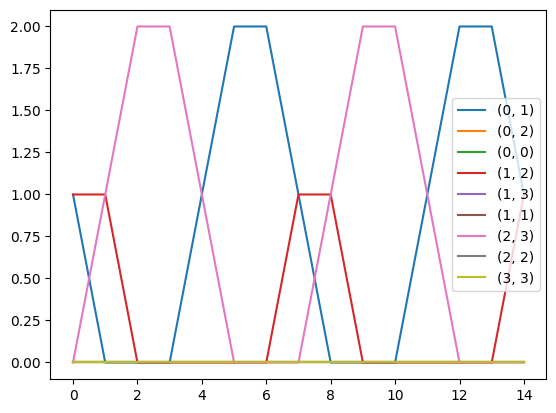

In [8]:
step_stats['flow'].plot()

### Single Braess

100%|██████████| 28/28 [00:17<00:00,  1.58it/s]


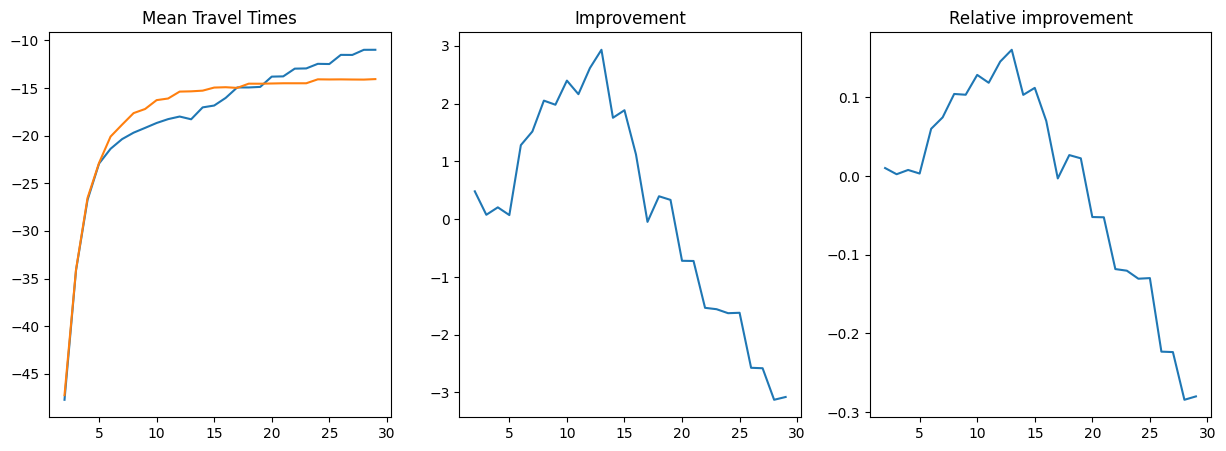

Best improvement found with capacity: 13


In [17]:
number_of_steps = 1000
car_counts = {(0, 3): 30}

mean_travel_times_allowed = []
mean_travel_times_prohibited = []
for capacity in trange(2, 30):
    for allowed_edge in [True, False]:
        network = create_braess_network(capacity=capacity)
        model = TrafficModel(network, create_cars(network, car_counts=car_counts))
        model.set_edge_restriction((1, 2), allowed=allowed_edge)
        step_stats, car_stats = model.run_sequentially(number_of_steps, show_progress=False)

        if allowed_edge:
            mean_travel_times_allowed.append((-car_stats["travel_time"]).mean())
        else:
            mean_travel_times_prohibited.append((-car_stats["travel_time"]).mean())

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

ax1.plot(range(2,30), pd.DataFrame({'allowed': mean_travel_times_allowed, 'prohibited': mean_travel_times_prohibited}))
ax1.set_title('Mean Travel Times')

improvement = np.array(mean_travel_times_prohibited) - np.array(mean_travel_times_allowed)
ax2.plot(range(2,30), improvement)
ax2.set_title('Improvement')

relative_improvement = improvement / abs(np.array(mean_travel_times_allowed))
ax3.plot(range(2,30), relative_improvement)
ax3.set_title('Relative improvement')

plt.show()

print(f'Best improvement found with capacity: {np.argmax(improvement) + 2}')

In [10]:
network = create_braess_network(capacity=13)
model = TrafficModel(network, create_cars(network, car_counts=car_counts))
model.set_edge_restriction((1, 2), allowed=False)
step_stats, car_stats = model.run_sequentially(number_of_steps)

100%|██████████| 1000/1000 [00:00<00:00, 3467.38it/s]


In [11]:
(-car_stats["travel_time"]).mean()

-15.334191555097837

In [12]:
car_stats.groupby('route').count()

,step,car_id,source,target,travel_time,toll
route,,,,,,
"(0, 1, 3)",962,962,962,962,962,962
"(0, 2, 3)",962,962,962,962,962,962
"(1, 2, 3)",2,2,2,2,2,2
"(1, 3)",15,15,15,15,15,15
"(2, 3)",1,1,1,1,1,1


### Double Braess

In [ ]:
number_of_steps = 1000
car_counts = {(0, 3): 10, ('A', 'B'): 30}

mean_travel_times_allowed = []
mean_travel_times_prohibited = []
for capacity in range(2, 30):
    for allowed_edge in [True, False]:
        network = create_double_braess_network(capacity=capacity)
        model = TrafficModel(network, create_cars(network, car_counts=car_counts))
        model.set_edge_restriction((0, 2), allowed=allowed_edge)
        step_stats, car_stats = model.run_sequentially(number_of_steps)

        if allowed_edge:
            mean_travel_times_allowed.append((-car_stats["travel_time"]).mean())
        else:
            mean_travel_times_prohibited.append((-car_stats["travel_time"]).mean())

f, (ax1, ax2) = plt.subplots(1, 2)
f.set_figwidth(10)
ax1.plot(range(2,30), pd.DataFrame({'allowed': mean_travel_times_allowed, 'prohibited': mean_travel_times_prohibited}))
ax1.set_title('Mean Travel Times')

improvement = np.array(mean_travel_times_prohibited) - np.array(mean_travel_times_allowed)
ax2.plot(range(2,30), improvement)
ax2.set_title('Improvement')

plt.show()

print(f'Best improvement found with capacity: {np.argmax(improvement) + 2}')

In [10]:
network = create_double_braess_network(capacity=7)
model = TrafficModel(network, create_cars(network, car_counts=car_counts))
model.set_edge_restriction((0, 2), allowed=True)
model.set_edge_restriction((1, 2), allowed=True)
step_stats, car_stats = model.run_sequentially(number_of_steps)

In [11]:
(-car_stats["travel_time"]).mean()

-19.568281938325992

In [12]:
car_stats.groupby('route').count()

,step,car_id,source,target,travel_time
route,,,,,
"(0, 1, 2, 3)",481,481,481,481,481
"(0, 1, 2, B)",2,2,2,2,2
"(0, 2, 3)",274,274,274,274,274
"(0, 2, B)",2,2,2,2,2
"(0, B)",1,1,1,1,1
"(1, 2, 3)",3,3,3,3,3
"(1, 3)",1,1,1,1,1
"(2, 3)",2,2,2,2,2
"(2, B)",2,2,2,2,2


In [13]:
car_stats.groupby(["route"])["travel_time"].mean()

route
(0, 1, 2, 3)       17.792100
(0, 1, 2, B)        7.500000
(0, 2, 3)          18.824818
(0, 2, B)          13.500000
(0, B)             19.000000
(1, 2, 3)           7.000000
(1, 3)              8.000000
(2, 3)              3.500000
(2, B)              3.000000
(A, 0, 1, 2, 3)    19.000000
(A, 0, 1, 2, B)    21.440204
(A, 0, 2, B)       21.903553
(A, 2, 3)          25.000000
(A, 2, B)          23.000000
Name: travel_time, dtype: float64